In [2]:
import numpy as np

In [3]:
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')

In [4]:
dat.shape

(39209, 118)

In [7]:
S=S**2/np.sum(S**2)
S

array([9.91204752e-01, 9.38611882e-04, 8.05638158e-04, 6.89671051e-04,
       5.19962693e-04, 4.74624948e-04, 3.36163108e-04, 3.00524306e-04,
       2.71645054e-04, 2.43630293e-04, 2.02843439e-04, 1.87135222e-04,
       1.76257342e-04, 1.67907734e-04, 1.53661056e-04, 1.39623081e-04,
       1.32025009e-04, 1.24667954e-04, 1.10168382e-04, 9.80320938e-05,
       9.32835002e-05, 8.77105260e-05, 8.69690121e-05, 8.28971608e-05,
       7.88240513e-05, 7.86690436e-05, 7.38670867e-05, 7.03650355e-05,
       6.44642055e-05, 6.35485467e-05, 6.30677941e-05, 6.00387163e-05,
       5.58615886e-05, 5.48706013e-05, 5.26553167e-05, 5.11414648e-05,
       4.99504126e-05, 4.77447984e-05, 4.70967514e-05, 4.57382547e-05,
       4.36995964e-05, 4.16083513e-05, 4.02070445e-05, 3.96354658e-05,
       3.88759638e-05, 3.67311693e-05, 3.59135515e-05, 3.54794953e-05,
       3.53070082e-05, 3.41017539e-05, 3.28253965e-05, 3.20072064e-05,
       3.14548994e-05, 3.06300455e-05, 2.95377036e-05, 2.81879089e-05,
      

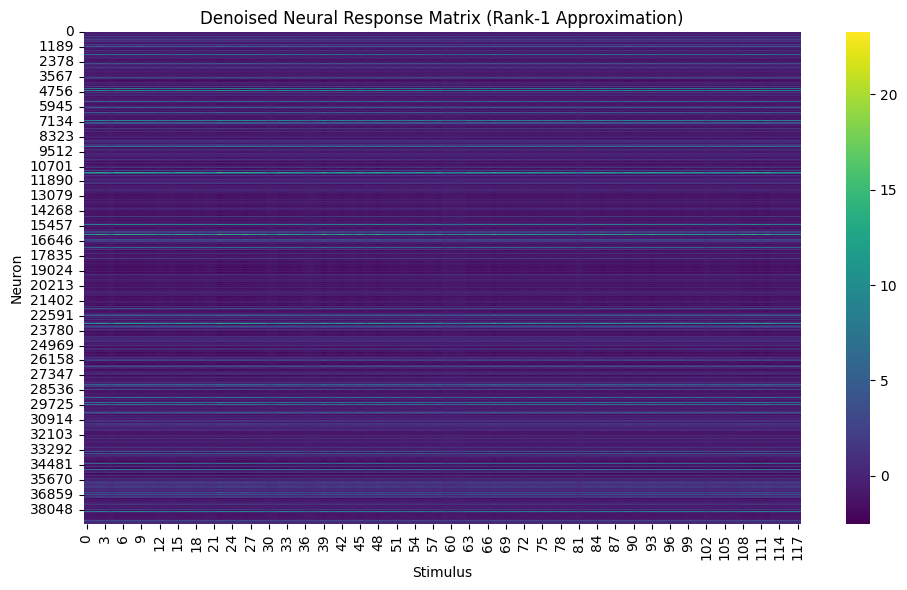

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume you already have your real matrix
# A should be the real neuron x stimulus matrix
# For example:
# A = np.load("your_data.npy")  # shape (n_neurons, n_stimuli)
A=dat
# Step 1: Mean center the data (PCA assumes zero mean)
A_centered = A - A.mean(axis=0)
# Step 1: Compute SVD
U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)

# Step 2: Take the first singular value/vector
rank_1 = S[0] * np.outer(U[:, 0], Vt[0, :])

# Step 3: Plot it
plt.figure(figsize=(10, 6))
sns.heatmap(rank_1, cmap="viridis", cbar=True)
#plt.imshow(rank_1,aspect='auto',cmap="viridis")
plt.title("Denoised Neural Response Matrix (Rank-1 Approximation)")
plt.xlabel("Stimulus")
plt.ylabel("Neuron")
plt.tight_layout()
plt.show()

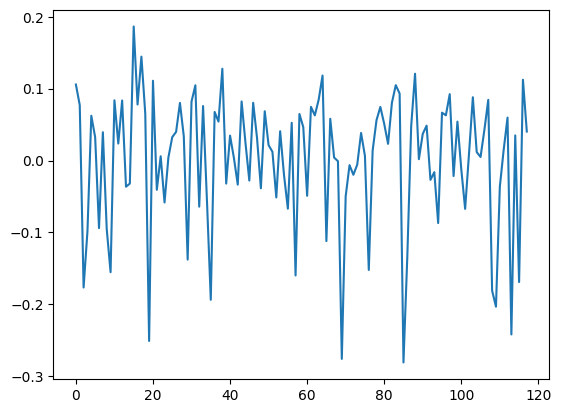

In [54]:
plt.plot(Vt[2,:])

In [36]:
from sklearn.decomposition import NMF
import numpy as np

# dat is your (n_neurons x n_stimuli) matrix
# Ensure non-negativity
assert np.all(dat >= 0), "NMF requires all entries in the matrix to be non-negative."

# Set number of latent components (rank of the factorization)
n_components = 10  # you can change this

# Initialize and fit the NMF model
nmf_model = NMF(n_components=n_components, init='nndsvda', max_iter=1000, random_state=42)
W = nmf_model.fit_transform(dat)  # shape: (n_neurons, n_components)
H = nmf_model.components_         # shape: (n_components, n_stimuli)

# Explained variance approximation
reconstructed = W @ H
reconstruction_error = np.linalg.norm(dat - reconstructed, ord='fro') / np.linalg.norm(dat, ord='fro')
print(f"Relative reconstruction error: {reconstruction_error:.4f}")


Relative reconstruction error: 0.5844


In [41]:
W.shape
H.shape

(10, 118)

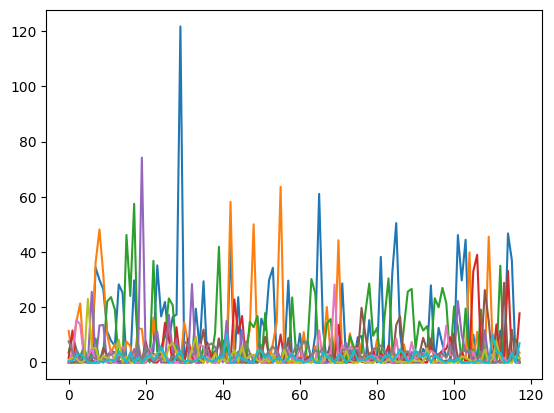

In [43]:
plt.plot(H.T)

In [47]:
print(W.shape,H.shape)

(39209, 10) (10, 118)


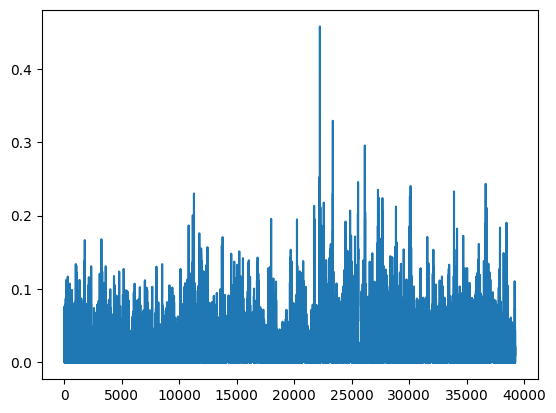

In [57]:
plt.plot(W[:,0].T)

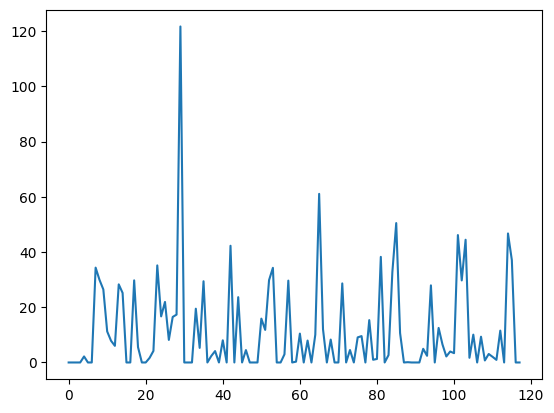

In [51]:
plt.plot(H[0,:])

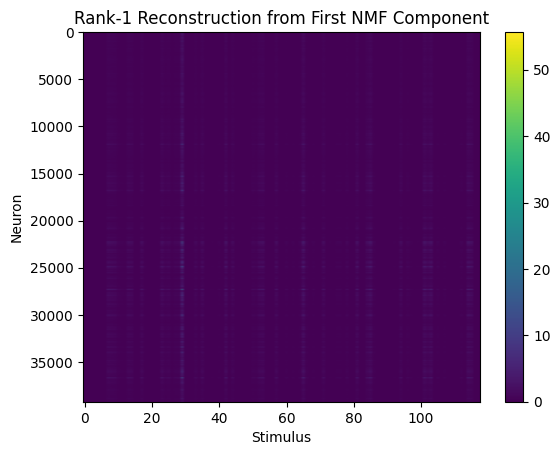

In [50]:
component_recon = np.outer(W[:, 0], H[0, :])  # shape (n_neurons, n_stimuli)
plt.imshow(component_recon, aspect='auto', cmap='viridis')
plt.title("Rank-1 Reconstruction from First NMF Component")
plt.xlabel("Stimulus")
plt.ylabel("Neuron")
plt.colorbar()
plt.show()

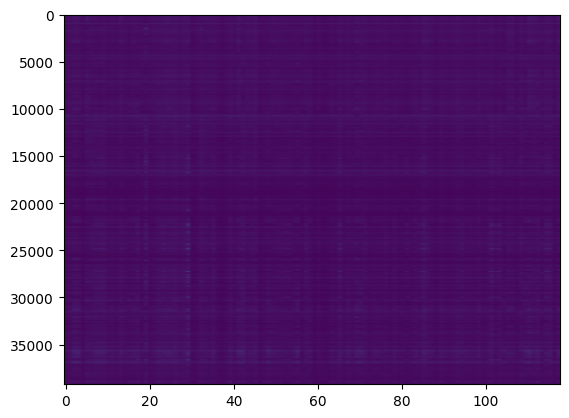

In [39]:
plt.imshow(reconstructed,aspect='auto')

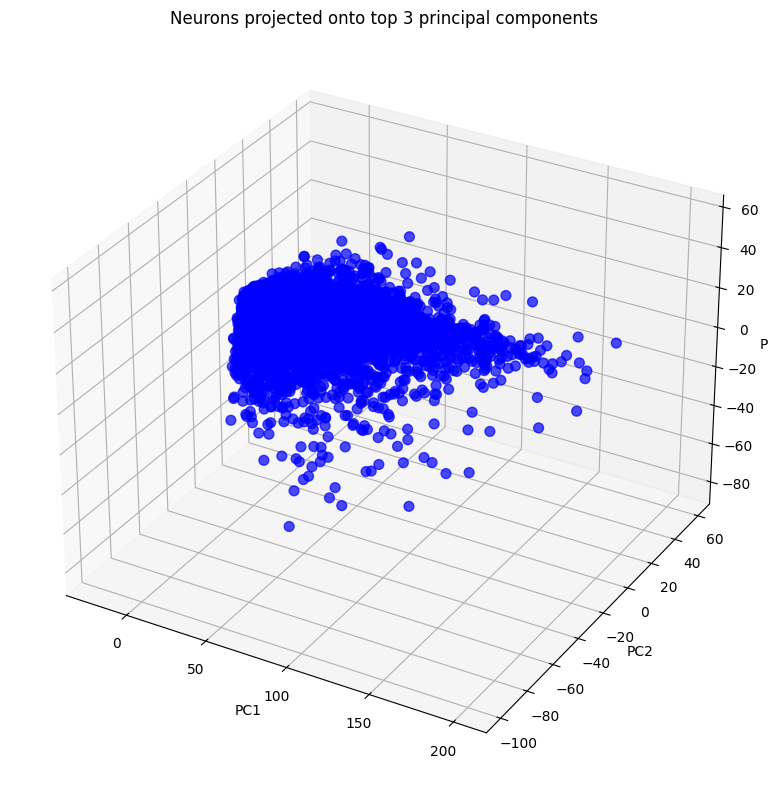

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# Assume A is your neuron x stimulus response matrix
# A = np.load("your_data.npy")
A=dat
# Step 1: Mean center the data (PCA assumes zero mean)
A_centered = A - A.mean(axis=0)

# Step 2: Perform SVD
U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)

# Step 3: Project data onto top 3 right singular vectors (principal components)
# Rows of Vt are the PCs of stimulus space; columns of U*S are projections
# Here we plot neurons projected into the top 3 PCs
A_proj = U[:, :3] * S[:3]  # shape (n_neurons, 3)

# Step 4: 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A_proj[:, 0], A_proj[:, 1], A_proj[:, 2], c='blue', s=50, alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Neurons projected onto top 3 principal components")
plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import plotly.graph_objects as go

# Assume A is your neuron x stimulus response matrix
# A = np.load("your_data.npy")

# Step 1: Mean center the data
A_centered = A - A.mean(axis=0)

# Step 2: Compute SVD
U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)

# Step 3: Project neurons onto top 3 principal components
A_proj = U[:, :3] * S[:3]  # shape (n_neurons, 3)

# Step 4: Create interactive 3D scatter plot with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=A_proj[:, 0],
    y=A_proj[:, 1],
    z=A_proj[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=A_proj[:, 0],  # Can change to another value
        colorscale='Viridis',
        opacity=0.8
    ),
    text=[f"Neuron {i}" for i in range(A_proj.shape[0])]
)])

fig.update_layout(
    title="Top 3 Principal Components of Neural Responses",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    width=800,
    height=600
)

fig.show()


In [15]:
S**2/np.sum(S**2)

array([0.30793114, 0.02665605, 0.02397799, 0.02259058, 0.0194793 ,
       0.01880357, 0.015954  , 0.0150939 , 0.01428412, 0.01358085,
       0.01240043, 0.01190921, 0.0115415 , 0.01128139, 0.01079007,
       0.01028782, 0.01000175, 0.0096943 , 0.00913623, 0.00861945,
       0.00839842, 0.00814513, 0.0081196 , 0.0079255 , 0.00773009,
       0.00772213, 0.00746755, 0.0073034 , 0.00698051, 0.00693741,
       0.00691422, 0.00674647, 0.00650496, 0.00644825, 0.00631674,
       0.00622651, 0.00614475, 0.00600847, 0.00597407, 0.00588741,
       0.00575377, 0.00561288, 0.00551958, 0.00548155, 0.00542283,
       0.00527444, 0.00521706, 0.00518456, 0.00517357, 0.00508451,
       0.00498844, 0.00492554, 0.00488039, 0.00481833, 0.00473056,
       0.00462111, 0.0045856 , 0.00453323, 0.00449596, 0.00441761,
       0.00432449, 0.00428393, 0.00425664, 0.00419254, 0.00413931,
       0.00408468, 0.00400721, 0.00397118, 0.00395464, 0.00387595,
       0.00384564, 0.00375711, 0.0037148 , 0.00369048, 0.00363

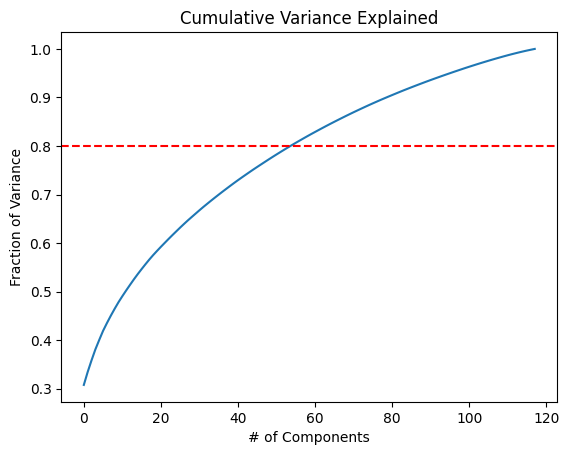

In [17]:
explained = S**2 / np.sum(S**2)
cumulative = np.cumsum(explained)
plt.plot(cumulative)
plt.axhline(0.8, color='r', linestyle='--')
plt.title("Cumulative Variance Explained")
plt.xlabel("# of Components")
plt.ylabel("Fraction of Variance")
plt.show()

In [26]:
!pip install rastermap

  Using cached rastermap-1.0-py3-none-any.whl.metadata (20 kB)
Using cached rastermap-1.0-py3-none-any.whl (90 kB)


2025-07-21 02:22:41,429 [INFO] normalizing data across axis=1
2025-07-21 02:22:41,467 [INFO] projecting out mean along axis=0
2025-07-21 02:22:41,503 [INFO] data normalized, 0.07sec
2025-07-21 02:22:41,505 [INFO] sorting activity: 39209 valid samples by 118 timepoints
2025-07-21 02:22:43,431 [INFO] n_PCs = 80 computed, 2.00sec
2025-07-21 02:22:44,650 [INFO] 20 clusters computed, time 3.22sec
2025-07-21 02:22:44,756 [INFO] clusters sorted, time 3.33sec
2025-07-21 02:22:44,907 [INFO] clusters upsampled, time 3.48sec
2025-07-21 02:22:44,925 [INFO] rastermap complete, time 3.50sec


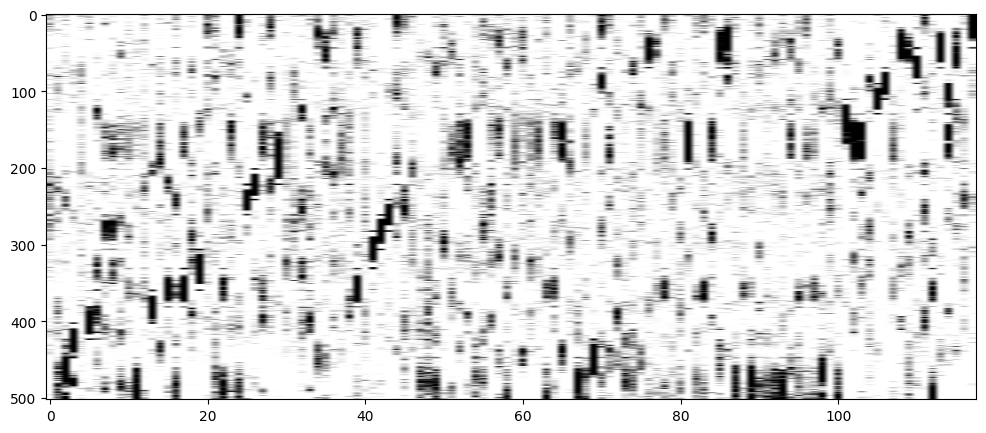

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap

# spks is neurons by time
#spks = np.load("spks.npy").astype("float32")
spks=dat

# fit rastermap
model = Rastermap(n_PCs=80, n_clusters=20, 
                  locality=0.9, time_lag_window=5).fit(spks)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")